# Census Income

#### Project Description

- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

##### Description of fnlwgt (final weight)
- The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

- We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

##### Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv


We need to focus on the following columns in the dataset:

Age: Calculate or validate the age of individuals. Ensure the age data is accurate and consistent. You can calculate the age from birthdate if needed using SQL or another data processing tool.

Workclass: Categorize the work class of individuals. This may include classes like private, self-employed, government, etc.

Fnlwgt (Final Weight): This is a calculated weight that represents the number of people the Census believes the entry represents. It helps in making the sample representative of the overall population.

Education: Record the highest level of education achieved by individuals. This may be recorded as strings like 'Bachelors', 'Masters', etc.

Education_num: A numerical representation of the education level. For example, 'Bachelors' might be represented as 13.

Marital_status: Record the marital status of individuals, such as 'Married', 'Never-married', 'Divorced', etc.

Occupation: Record the occupation of individuals. This can include categories like 'Tech-support', 'Craft-repair', etc.

Relationship: Record the relationship status of individuals within a household, such as 'Husband', 'Wife', 'Not-in-family', etc.

Race: Record the race of individuals. Categories might include 'White', 'Black', 'Asian-Pac-Islander', etc.

Sex: Record the gender of individuals, typically 'Male' or 'Female'.

Capital_gain: Record the capital gains received by individuals in the past year.

Capital_loss: Record the capital losses incurred by individuals in the past year.

Hours_per_week: Record the number of hours individuals work per week.

Native_country: Record the native country of individuals.

Income: The target variable for prediction. Record whether an individual's income exceeds $50K per year or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##### We are working on the analysis of 32560 rows and 15 columns

In [3]:
'''IMPORTING THE LIBRARIES
EPLORATORY DATA ANALYSIS
do non graphical analysis
ghraphical analysis
    univariate analysis
    bivariate analysis
    multivaraiate analysis
check outliers and remove if present
check multicollinearity
remove multicollinearity if present
apply feature scaling methods on numerical features
apply resampling methods to balance the classes(in classification problem
also apply feature selection methods)
Model Building
Cross Validation Score
Ploting ROC AUC Curve
Predicting the saved Model'''

'IMPORTING THE LIBRARIES\nEPLORATORY DATA ANALYSIS\ndo non graphical analysis\nghraphical analysis\n    univariate analysis\n    bivariate analysis\n    multivaraiate analysis\ncheck outliers and remove if present\ncheck multicollinearity\nremove multicollinearity if present\napply feature scaling methods on numerical features\napply resampling methods to balance the classes(in classification problem\nalso apply feature selection methods)\nModel Building\nCross Validation Score\nPloting ROC AUC Curve\nPredicting the saved Model'

In [4]:
df.shape

(32560, 15)

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Observations:
- The dataframe has 6 int64 datatype and 9 object datatype
- We donot see any null values present 

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- No null values found

<Axes: >

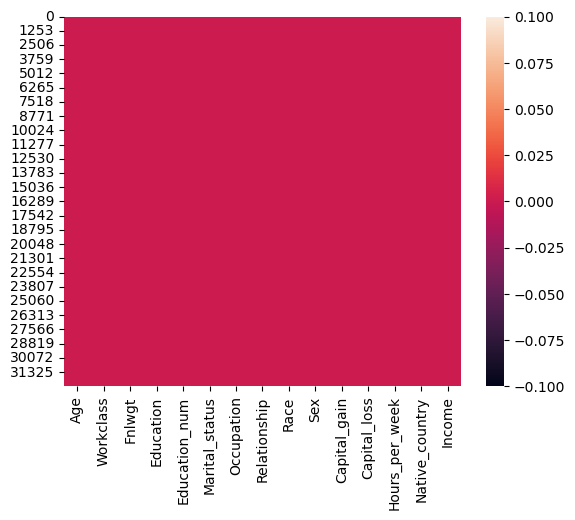

In [10]:
sns.heatmap(df.isnull()) # we can cleaerly visualize that there is no null value present

- From the Heatmap it is confirmed that thee data donot have any null values

In [11]:
df['Income'].value_counts() # to see the split up of data in target variable 

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [12]:
# checking the value counts of each column
for i in df.columns:
    print (df[i].value_counts())
    #print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

OBSERVATIONS:
- We find that Workclass , Occupation and Native_country have some rows with '?', we have to treat them and fill some values

In [13]:
#Let check how many question mark (' ?') inside dataset.
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [14]:
df["Workclass"]=df["Workclass"].replace(" ?",np.nan)
df["Occupation"]=df["Occupation"].replace(" ?",np.nan)
df["Native_country"]=df["Native_country"].replace(" ?",np.nan)

In [15]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [16]:
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [17]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [18]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [19]:
# lets even find if we have white spaces or NA or '-' in the data 
df.isin([' ','NA','-']).sum().any()

False

In [20]:
# Now lets check if we have duplicate values
duplicate_count = df.duplicated().sum()
print(duplicate_count) 

24


In [21]:
# Drop duplicates
df= df.drop_duplicates()

print("\nDataFrame after dropping duplicates:")
print(df)


DataFrame after dropping duplicates:
       Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husb

# Lets work on null values now 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [23]:
# Filling the null values with Mode imputation
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [24]:
#checking the data again if null values are left
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Finally no missing values left. The data is ready for Analysis

# Separating Numerical and Categorical column

In [25]:
#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns:",categorical_col)

#checking numerical Columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

Categorical Columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numerical Columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [26]:
#checking number of unique values in each column
df.nunique().to_frame("No.of Unique Values")

,No.of Unique Values
Age,73
Workclass,8
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,14
Relationship,6
Race,5
Sex,2


# Descriptive Statistics

In [27]:
# statistical summary of numerical com
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### OBSERVATIONS:
- this gives statistical explanation of Numerical columns.  the dataset looks perfect as theres no invalid or negative value present
- From the above we can see that all the counts are same , that means that there is no null value
- Mean is more than median for Age, Capital_gain and Capital_loss. Hense the data is right and positively skewed.
- There is huge difference between 75% (Quartile 3) in Age, Capital_gain, Capital_loss and Hours_per_week. Huge number of outliers are present in these columns.  

#### Before moving further we need to drop Capital_gain and Capital_loss columns as most the valuees in the columns are '0'. Though the values are not null but still as most of the values are 0. the columns wil have lots of outliers and will be a skewed data. 

In [28]:
# droping the columns having more number of 0's
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

#### We can also dro[p Education_num as its just a number code given to the specific type of educstion and it has no impact on thee analysis]

In [29]:
df.drop("Education_num",axis=1,inplace=True)

# Data Visualization

### Univarity Analysis

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64
Income Percentages:
 <=50K    75.906688
 >50K     24.093312
Name: Income, dtype: float64


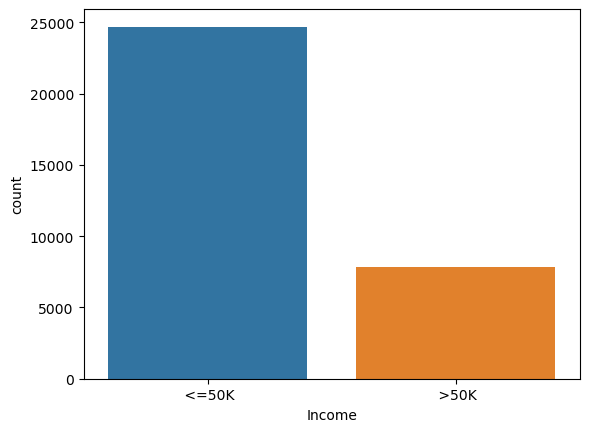

In [30]:
#visualize number of Target Income 
income = sns.countplot(x='Income',data=df)
print (df['Income'].value_counts())
# Calculate percentages
income_counts = df['Income'].value_counts()
income_percentages = income_counts / income_counts.sum() * 100
# Display percentages
print("Income Percentages:")
print(income_percentages)

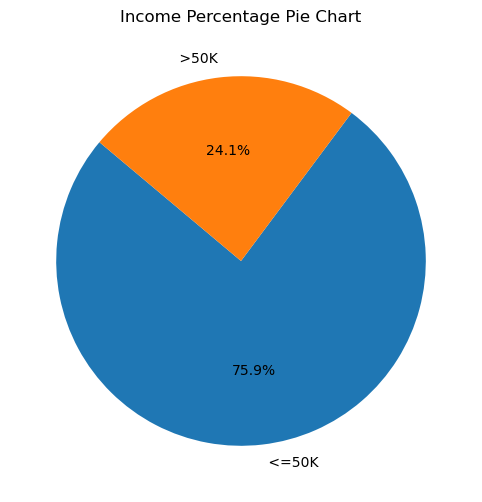

In [31]:
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(income_percentages, labels=income_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Percentage Pie Chart')
plt.show()

##### Insights:
- People earning >50K is 24.1 % and <=50K is 75.9%

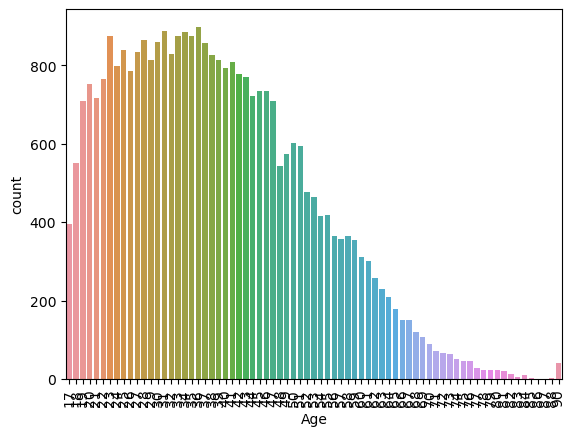

<Figure size 3000x3000 with 0 Axes>

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


In [32]:
# Assuming df is your DataFrame
age = sns.countplot(x='Age', data=df)
# Increase figure size
plt.figure(figsize=(30, 30))
# Rotate x-axis labels to 90 degrees
age.set_xticklabels(age.get_xticklabels(), rotation=90)
# Show the plot
plt.show()
# Print the value counts of 'Age'
print(df['Age'].value_counts())

In [33]:
# Assuming 'df' is your DataFrame with an 'Age' column
max_age = df['Age'].max()  # Maximum age
min_age = df['Age'].min()  # Minimum age
mode_age = df['Age'].mode()[0]  # Mode of age (taking the first value if multiple modes exist)
print(f"Maximum Age: {max_age}")
print(f"Minimum Age: {min_age}")
print(f"Mode of Age: {mode_age}")

Maximum Age: 90
Minimum Age: 17
Mode of Age: 36


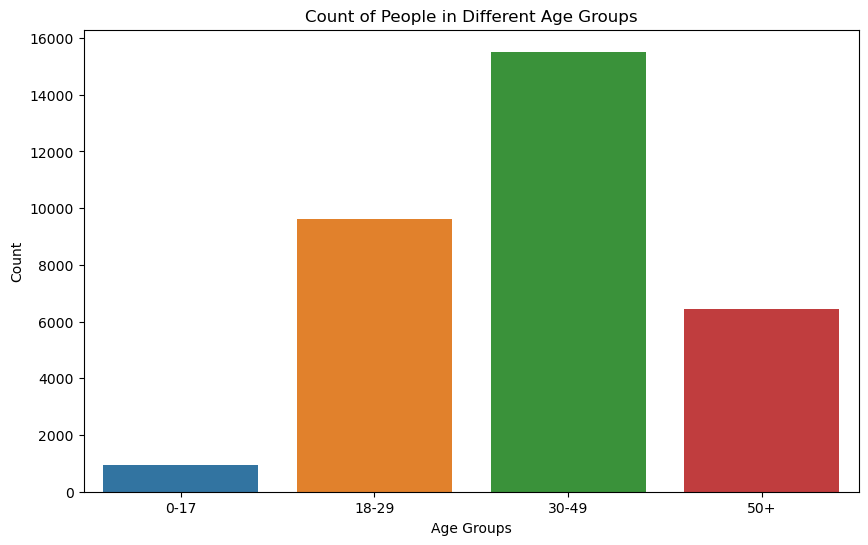

In [34]:
# Example for age ranges, adjust as per your actual data
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['0-17', '18-29', '30-49', '50+'])
# Plotting count of each age group
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(x='AgeGroup', data=df)
plt.title('Count of People in Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

- Data of People fall more in the age group of 30-49 followed by 18-29

Education Percentages:
 HS-grad         32.253504
 Some-college    22.381362
 Bachelors       16.449471
 Masters          5.292599
 Assoc-voc        4.247603
 11th             3.611384
 Assoc-acdm       3.279444
 10th             2.867593
 7th-8th          1.982419
 Prof-school      1.770347
 9th              1.579789
 12th             1.330834
 Doctorate        1.269363
 5th-6th          1.020408
 1st-4th          0.510204
 Preschool        0.153676
Name: Education, dtype: float64


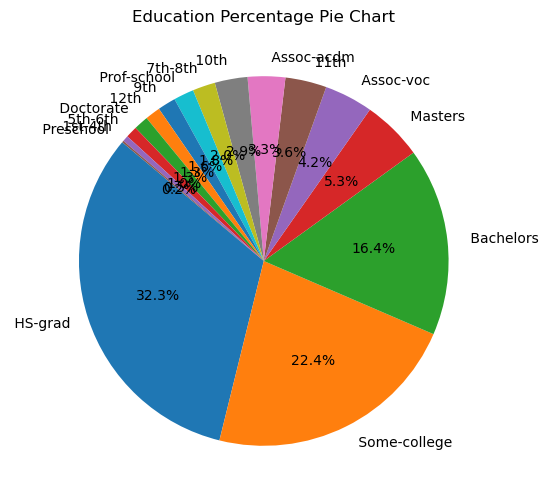

In [35]:
# Calculate percentages for Education
Education_counts = df['Education'].value_counts()
Education_percentages = Education_counts /Education_counts.sum() * 100
# Display percentages
print("Education Percentages:")
print(Education_percentages)
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(Education_percentages, labels=Education_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Percentage Pie Chart')
plt.show()

- People from HS-grad has highest percentage 32.25% followed by Some-college 22.38% and then Bachelors 16.45%

Marital_status Percentages:
 Married-civ-spouse       46.010573
 Never-married            32.782149
 Divorced                 13.649496
 Separated                 3.150357
 Widowed                   3.052004
 Married-spouse-absent     1.284731
 Married-AF-spouse         0.070691
Name: Marital_status, dtype: float64


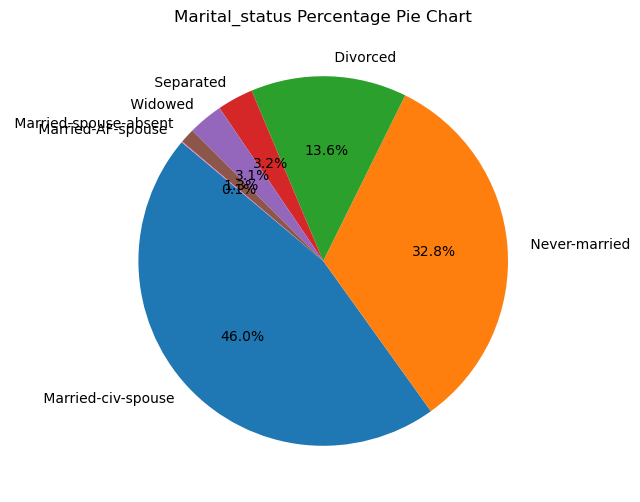

In [36]:
# Calculate percentages for Marital_status
Marital_status_counts = df['Marital_status'].value_counts()
Marital_status_percentages = Marital_status_counts /Marital_status_counts.sum() * 100
# Display percentages
print("Marital_status Percentages:")
print(Marital_status_percentages)
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(Marital_status_percentages, labels=Marital_status_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital_status Percentage Pie Chart')
plt.show()

- The data taken for study has more number of Married-civ-spouse 46% followed by Never-married 32.8% 

Occupation Percentages:
 Prof-specialty       18.376567
 Craft-repair         12.582985
 Exec-managerial      12.493853
 Adm-clerical         11.577944
 Sales                11.218343
 Other-service        10.114950
 Machine-op-inspct     6.147037
 Transport-moving      4.908409
 Handlers-cleaners     4.207647
 Farming-fishing       3.048930
 Tech-support          2.849152
 Protective-serv       1.994714
 Priv-house-serv       0.451807
 Armed-Forces          0.027662
Name: Occupation, dtype: float64


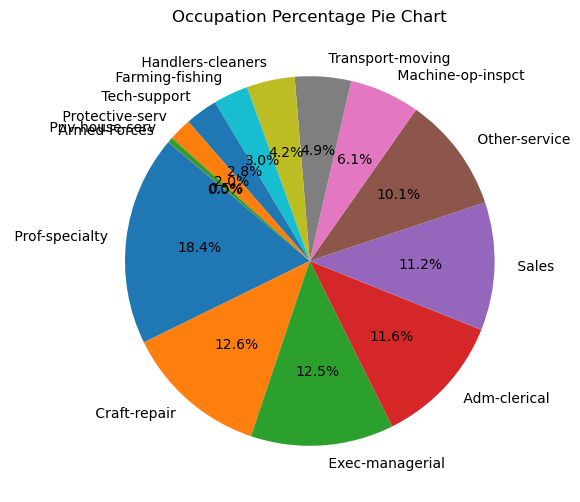

In [37]:
# Calculate percentages for Occupation
Occupation_counts = df['Occupation'].value_counts()
Occupation_percentages = Occupation_counts /Occupation_counts.sum() * 100
# Display percentages
print("Occupation Percentages:")
print(Occupation_percentages)
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(Occupation_percentages, labels=Occupation_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Occupation Percentage Pie Chart')
plt.show()

- Count of Prof-speciality is the highest 18.4% in the data. 

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


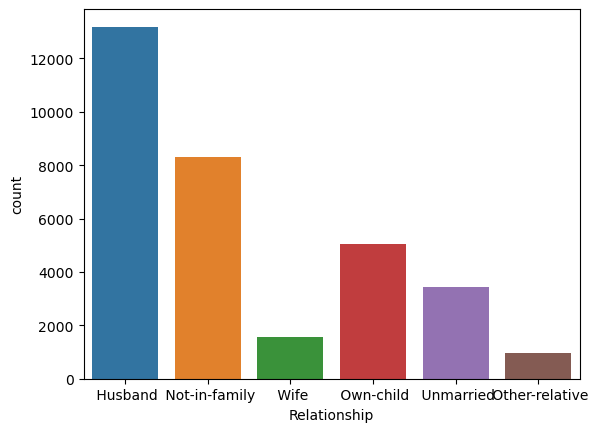

In [38]:
#visualize number of Relationship  
income = sns.countplot(x='Relationship',data=df)
print (df['Relationship'].value_counts())

- Data taken for study has more number of husbands 

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


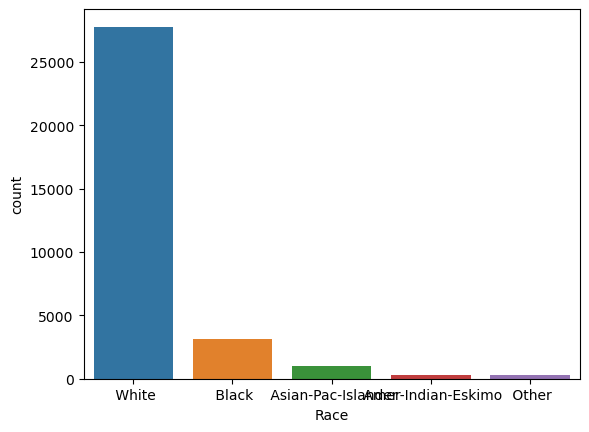

In [39]:
#visualize number of Race 
income = sns.countplot(x='Race',data=df)
print (df['Race'].value_counts())

- Data taken has majority of white in Race 

 Male      21774
 Female    10762
Name: Sex, dtype: int64


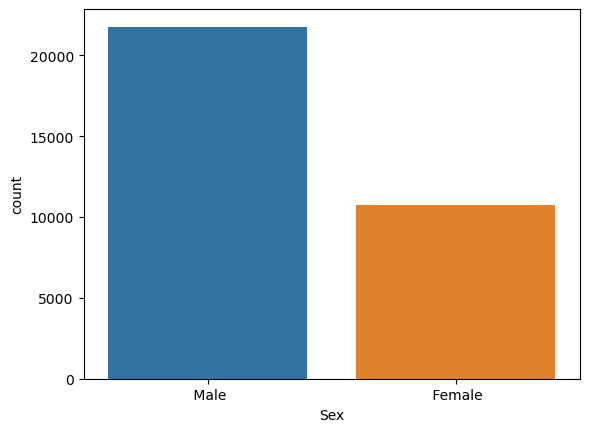

In [41]:
#visualize number of Sex 
income = sns.countplot(x='Sex',data=df)
print (df['Sex'].value_counts())

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

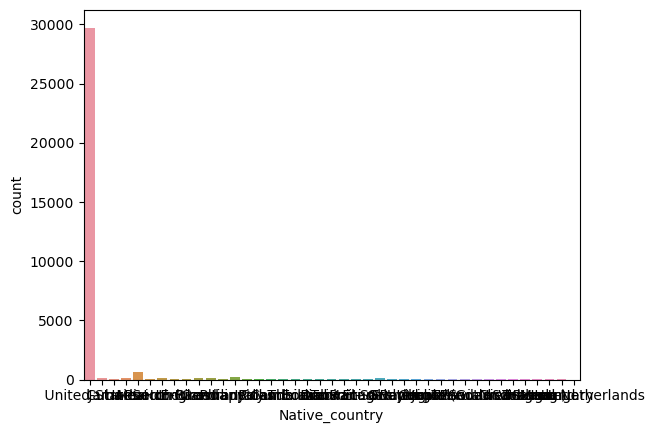

In [42]:
#visualize number of Native_country 
income = sns.countplot(x='Native_country',data=df)
print (df['Native_country'].value_counts())

# Bivariate Analysis

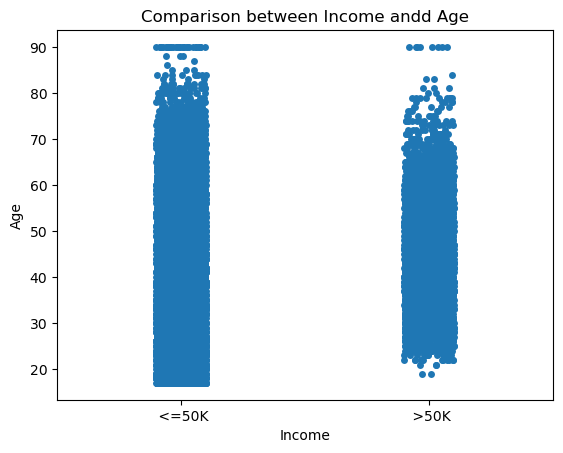

In [43]:
#Compare Income and Age 
plt.title("Comparison between Income andd Age")
sns.stripplot (x="Income", y="Age",data=df)
plt.show()

- People in the age between 25-70 are in highest count who earn mopre than 50K whereas majority count of people from 18-80 earns ,=50K

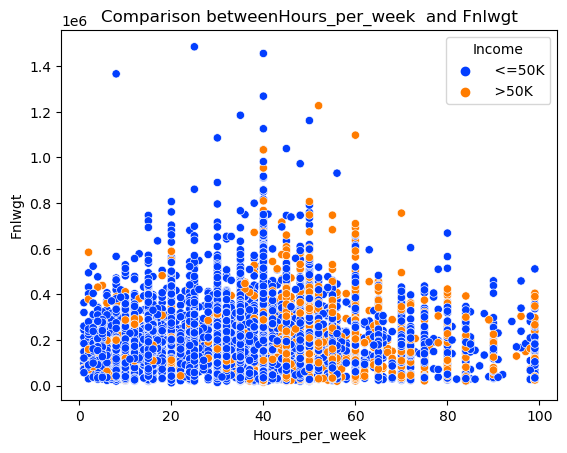

In [44]:
plt.title("Comparison betweenHours_per_week  and Fnlwgt")
sns.scatterplot (x="Hours_per_week", y="Fnlwgt",data=df, hue='Income',palette='bright')
plt.show()

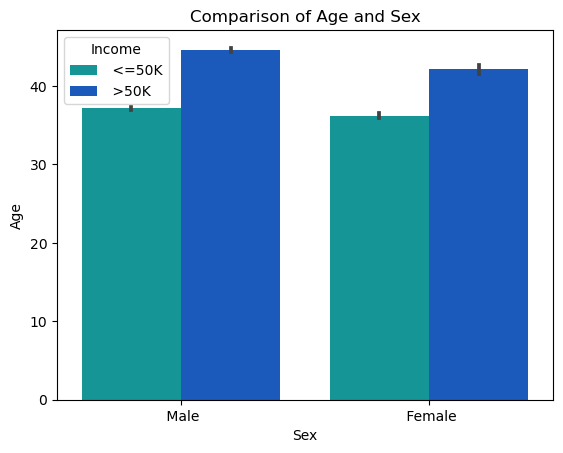

In [45]:
plt.title("Comparison of Age and Sex")
sns.barplot (x="Sex", y="Age",data=df, hue='Income',palette='winter_r')
plt.show()

- Majority of the citizens are Male. Both Male and female fall more into the category of earning more than 50K.

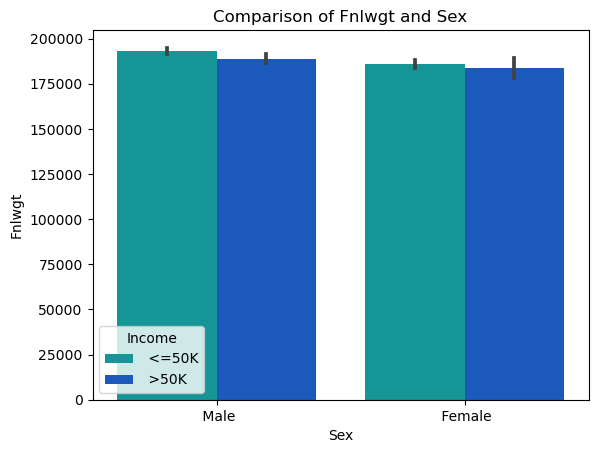

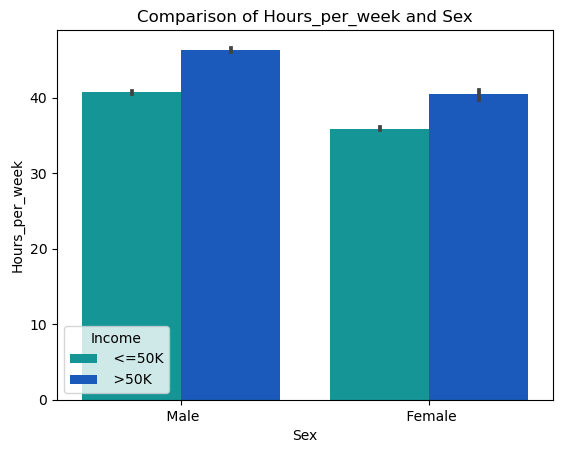

In [46]:
plt.title("Comparison of Fnlwgt and Sex")
sns.barplot (x="Sex", y="Fnlwgt",data=df, hue='Income',palette='winter_r')
plt.show()

plt.title("Comparison of Hours_per_week and Sex")
sns.barplot (x="Sex", y="Hours_per_week",data=df, hue='Income',palette='winter_r')
plt.show()

- Males and Females earning more than 50K is because their Hours_per_week is more

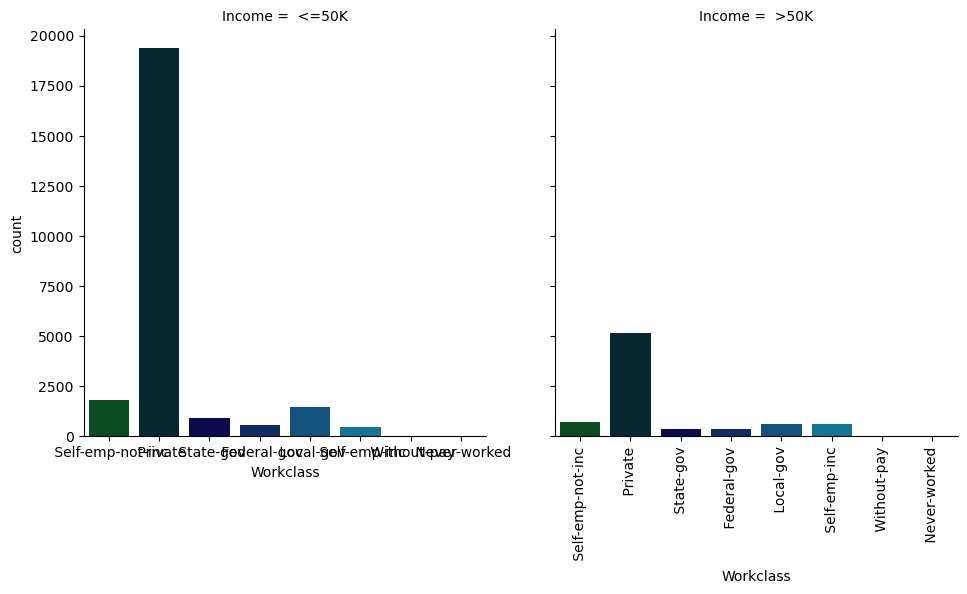

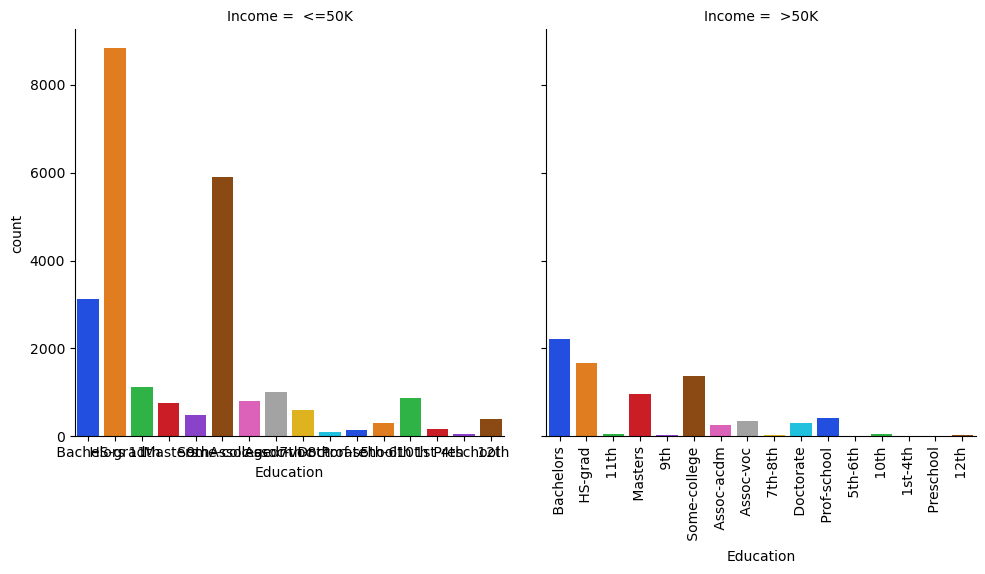

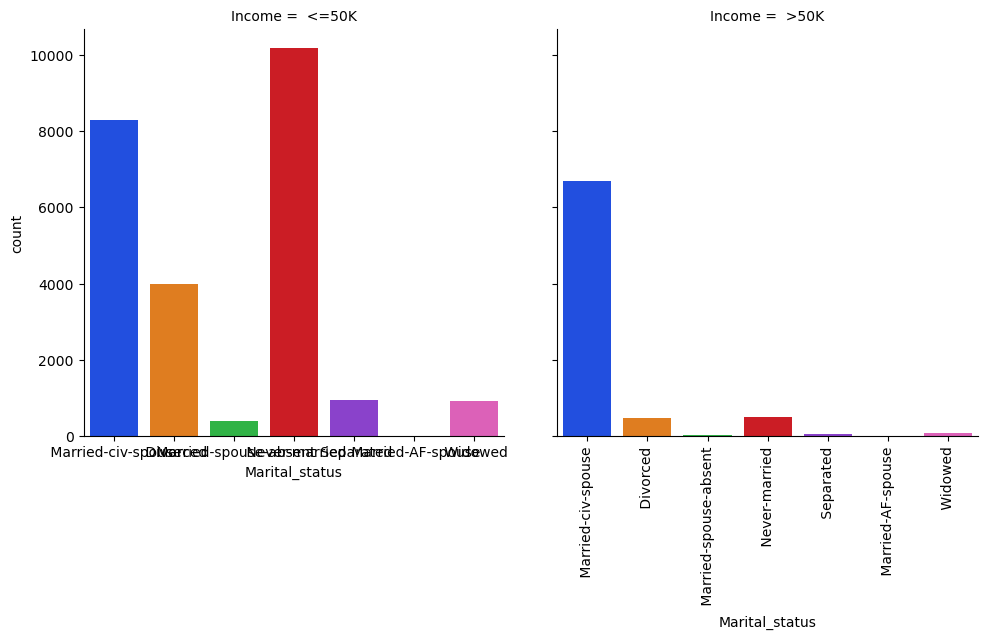

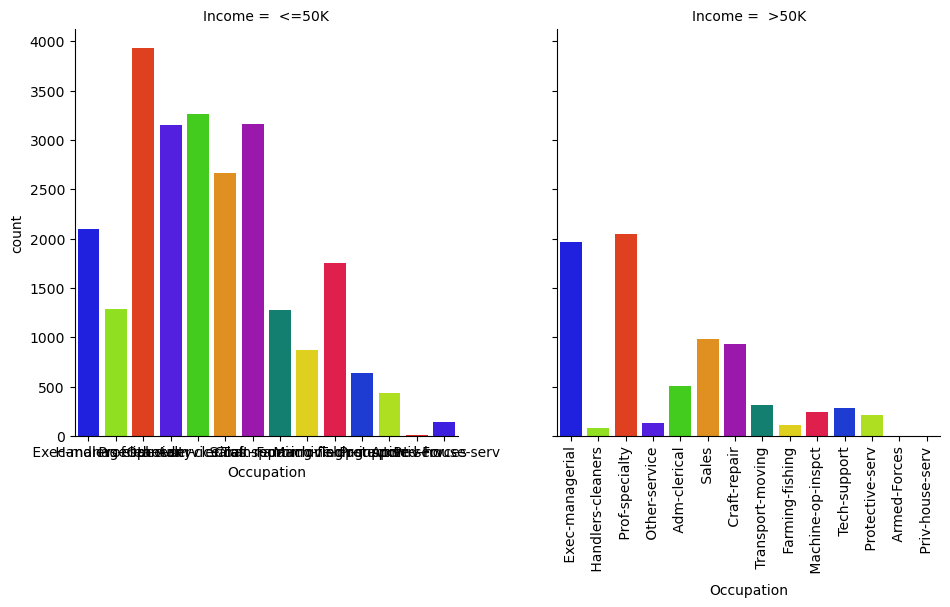

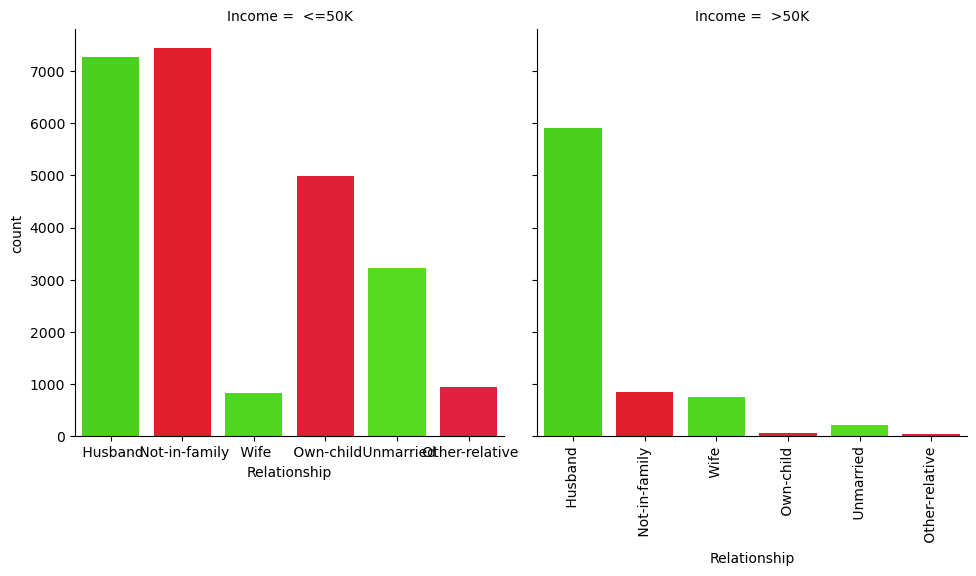

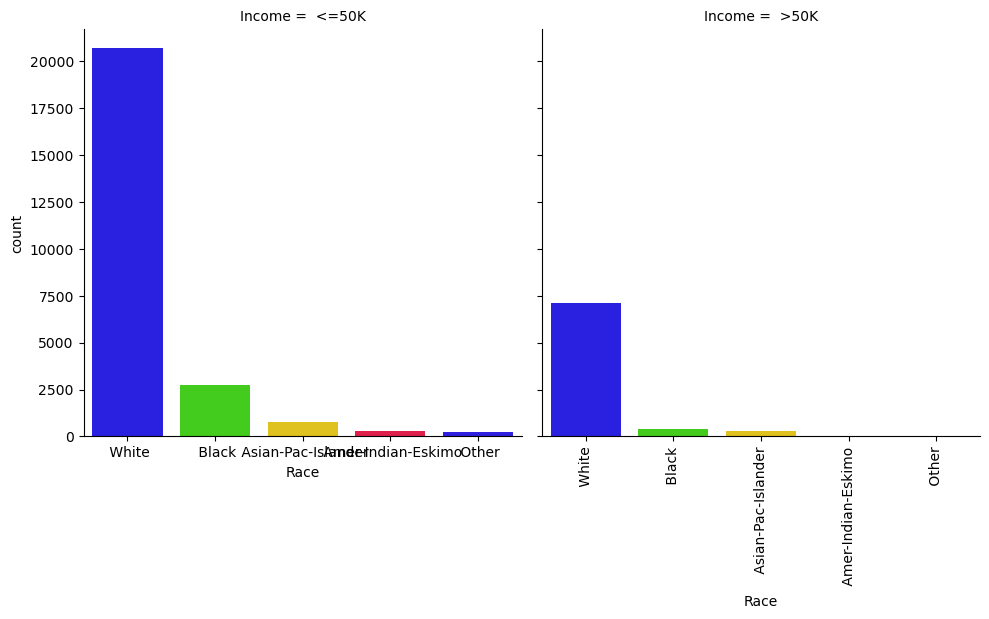

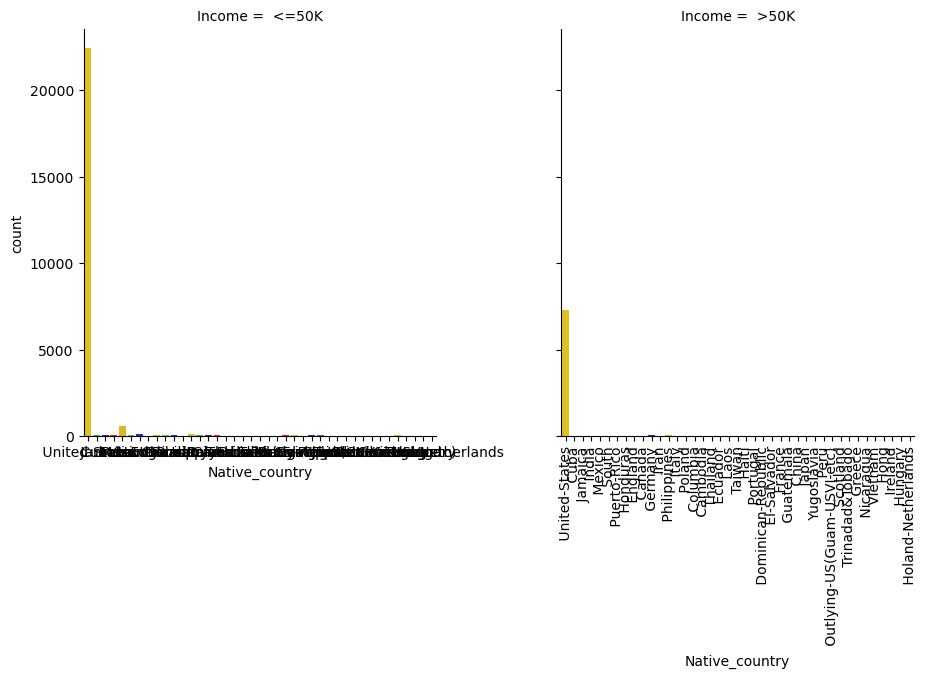

In [47]:
#checking Income and Workclass
sns.catplot (x="Workclass", col="Income",data=df, kind="count",palette='ocean')
plt.xticks(rotation=90)

#checking Income in Education
sns.catplot (x="Education", col="Income",data=df, kind="count",palette='bright')
plt.xticks(rotation=90)

#checking Income in Marital_status
sns.catplot (x="Marital_status", col="Income",data=df, kind="count",palette='bright')
plt.xticks(rotation=90)

#checking Income in Occupation
sns.catplot (x="Occupation", col="Income",data=df, kind="count",palette='prism')
plt.xticks(rotation=90)

#checking Income in Relationship
sns.catplot (x="Relationship", col="Income",data=df, kind="count",palette='prism')
plt.xticks(rotation=90)

#checking Income in Race
sns.catplot (x="Race", col="Income",data=df, kind="count",palette='prism')
plt.xticks(rotation=90)

#checking Income in Native_country
sns.catplot (x="Native_country", col="Income",data=df, kind="count",palette='prism')
plt.xticks(rotation=90)
plt.show()

### OBSERVATION:
- The People making more than 50K belongs more to education as Bachelors ut the one who are earning less than 50K have completed their education into HS-grad.
- The peeople earning equal to or less than 50K majority are Never-married followed by Married, whereas the one who earn more than 50K are married-civ-spouse.
- In both the cateegories of Income the highest eduction is Prof-speciality. People earining less than or equal to 50K are even Handlers-cleansers, Other-services, Admin-clerical, Craft-repair , Priv-j]house-serv, Exec-managerial.
- Majority of the earneers are Males than females in the both the category of Income But there is a huge number of count of Not-in-Family when it comes to earning less than or equal to 50K.
- When it comes to race , we find white the most. But for the category of <=50k even we find other races like Amer-Indian-Eskimos and others. 
- For both the caories the highest number of people are from USA.

# Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

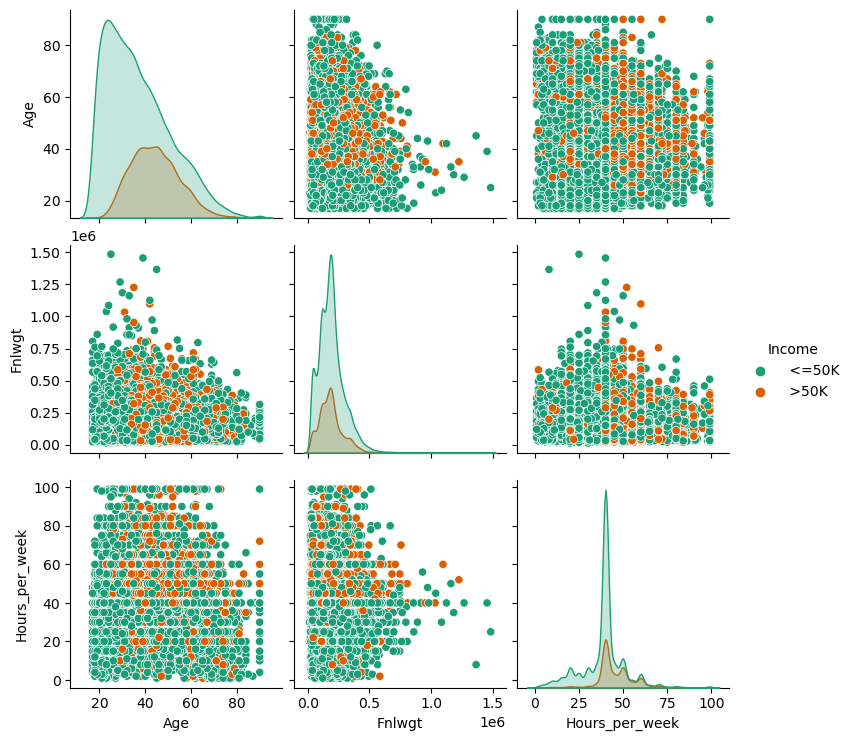

In [48]:
sns.pairplot(df,hue="Income", palette="Dark2")
plt.show

In [49]:
#Encoding categorical column using ordinal Method
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,AgeGroup
0,50,5.0,83311,9.0,2.0,3.0,0.0,4.0,1.0,13,38.0,0.0,30-49
1,38,3.0,215646,11.0,0.0,5.0,1.0,4.0,1.0,40,38.0,0.0,30-49
2,53,3.0,234721,1.0,2.0,5.0,0.0,2.0,1.0,40,38.0,0.0,50+
3,28,3.0,338409,9.0,2.0,9.0,5.0,2.0,0.0,40,4.0,0.0,18-29
4,37,3.0,284582,12.0,2.0,3.0,5.0,4.0,0.0,40,38.0,0.0,30-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,2.0,12.0,5.0,4.0,0.0,38,38.0,0.0,18-29
32556,40,3.0,154374,11.0,2.0,6.0,0.0,4.0,1.0,40,38.0,1.0,30-49
32557,58,3.0,151910,11.0,6.0,0.0,4.0,4.0,0.0,40,38.0,0.0,50+
32558,22,3.0,201490,11.0,4.0,0.0,3.0,4.0,1.0,20,38.0,0.0,18-29


In [50]:
df.drop("AgeGroup",axis=1,inplace=True)

# Checking the Outliers

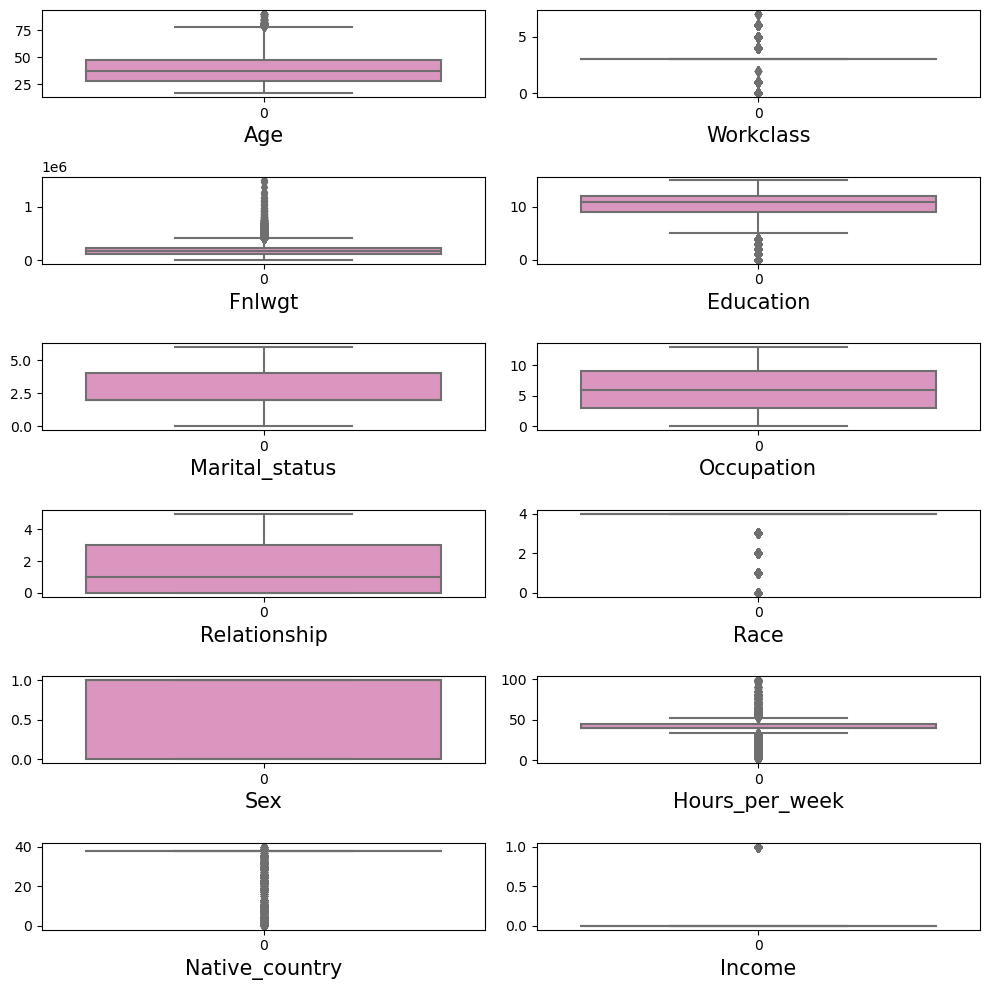

In [51]:
#checking outliers by Boxplot
plt.figure(figsize = (10,10), facecolor="white")
plotnumber= 1
for col in df:
    if plotnumber<=12:
        ax = plt.subplot (6,2,plotnumber)
        sns.boxplot (df[col],palette='Set2_r')
        plt.xlabel(col,fontsize= 15 )
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### Most of the columns have outliers and we will havee to treat them. 

# Treating Outliers

In [52]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
# Define threshold for outliers
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64),
 array([10,  9,  7, ...,  7,  7,  7], dtype=int64))

In [53]:
df1=df[(z<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,2.0,3.0,0.0,4.0,1.0,13,38.0,0.0
1,38,3.0,215646,11.0,0.0,5.0,1.0,4.0,1.0,40,38.0,0.0
2,53,3.0,234721,1.0,2.0,5.0,0.0,2.0,1.0,40,38.0,0.0
4,37,3.0,284582,12.0,2.0,3.0,5.0,4.0,0.0,40,38.0,0.0
5,49,3.0,160187,6.0,3.0,7.0,1.0,2.0,0.0,16,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,2.0,12.0,5.0,4.0,0.0,38,38.0,0.0
32556,40,3.0,154374,11.0,2.0,6.0,0.0,4.0,1.0,40,38.0,1.0
32557,58,3.0,151910,11.0,6.0,0.0,4.0,4.0,0.0,40,38.0,0.0
32558,22,3.0,201490,11.0,4.0,0.0,3.0,4.0,1.0,20,38.0,0.0


In [54]:
#Using IQR method to remove Outliers 
from scipy import stats
IQR = stats.iqr(df)
IQR

37.0

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [56]:
IQR = df[~ ((df < (Q1 -1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQR.shape)

(16289, 12)


#### So with IQR method we have only 16289 rows left and with Z-score we have 29428 rows left. So we will take Z-score as Outleirs elimination technique. 

In [57]:
##Percentage of data loss:
Data_loss = ((32536-29428)/32536)*100

In [58]:
Data_loss

9.552495697074011

# Finding Skewness

In [59]:
df1.skew()

Age               0.464797
Workclass         0.070937
Fnlwgt            0.629288
Education        -0.950043
Marital_status   -0.019042
Occupation        0.012458
Relationship      0.790418
Race             -2.618333
Sex              -0.719887
Hours_per_week   -0.345610
Native_country   -5.282306
Income            1.205181
dtype: float64

##### We can only skew numerical columns. We cannot skew catoegorical columns and target. So as per the observations all the values are near +/- 0.5. Hense we dont need to skew them. 

# Correlation

In [60]:
cor=df1.corr()
cor

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.035499,-0.075566,-0.004415,-0.285012,0.001779,-0.271066,0.021144,0.094348,0.093146,0.034733,0.248323
Workclass,0.035499,1.000000,-0.025104,0.003496,-0.021012,0.007718,-0.057066,0.066800,0.071136,0.030532,0.003210,0.003333
Fnlwgt,-0.075566,-0.025104,1.000000,-0.026126,0.028566,0.002934,0.012821,-0.100162,0.025231,-0.017239,-0.111452,-0.011817
Education,-0.004415,0.003496,-0.026126,1.000000,-0.039775,-0.041024,-0.009312,0.028258,-0.030640,0.060453,0.106333,0.075470
Marital_status,-0.285012,-0.021012,0.028566,-0.039775,1.000000,0.035075,0.185685,-0.088087,-0.131016,-0.199163,-0.033060,-0.197709
Occupation,0.001779,0.007718,0.002934,-0.041024,0.035075,1.000000,-0.039071,0.001848,0.047622,-0.020211,0.020913,0.033660
Relationship,-0.271066,-0.057066,0.012821,-0.009312,0.185685,-0.039071,1.000000,-0.145691,-0.582723,-0.267545,-0.007695,-0.251641
Race,0.021144,0.066800,-0.100162,0.028258,-0.088087,0.001848,-0.145691,1.000000,0.125801,0.060407,0.017688,0.098204
Sex,0.094348,0.071136,0.025231,-0.030640,-0.131016,0.047622,-0.582723,0.125801,1.000000,0.242187,-0.013755,0.216455
Hours_per_week,0.093146,0.030532,-0.017239,0.060453,-0.199163,-0.020211,-0.267545,0.060407,0.242187,1.000000,0.004440,0.243615


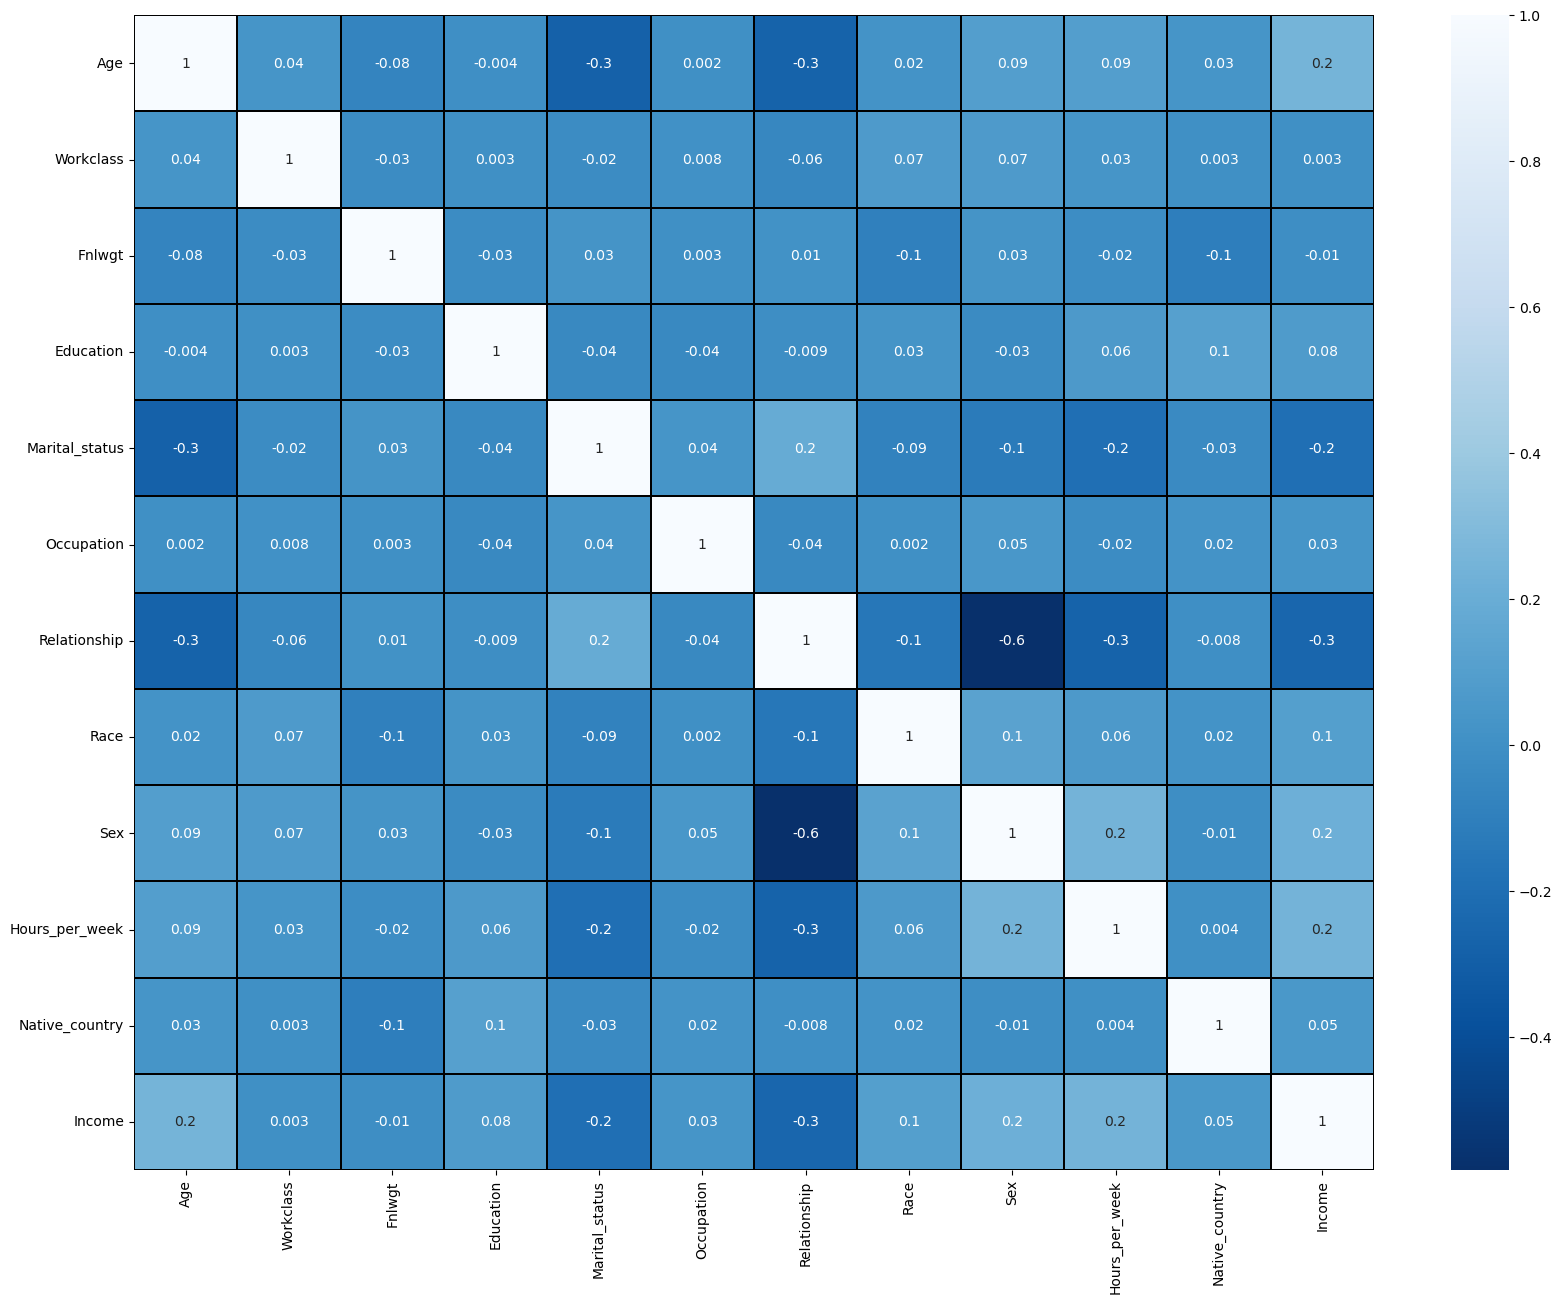

In [61]:
#visualizing corr by ploting heatmap
plt.figure(figsize=(20,15))
sns.heatmap (df1.corr(), linewidths=0.1,fmt=".1g",linecolor="black", annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

#### OBSERVATIONS:
- Sex and Relationship have good correlation with each other. 
- Rest all the columns have very less correlation. 

In [62]:
#there is no much positive correlation be features and targets
#0 = no correlation, -0.3 or +0.3 less corr, greater than -0.5 or + 0.5 moderate corr, greater than -0.7 or +0.7 is high correlation
cor["Income"].sort_values(ascending=True)

Relationship     -0.251641
Marital_status   -0.197709
Fnlwgt           -0.011817
Workclass         0.003333
Occupation        0.033660
Native_country    0.053952
Education         0.075470
Race              0.098204
Sex               0.216455
Hours_per_week    0.243615
Age               0.248323
Income            1.000000
Name: Income, dtype: float64

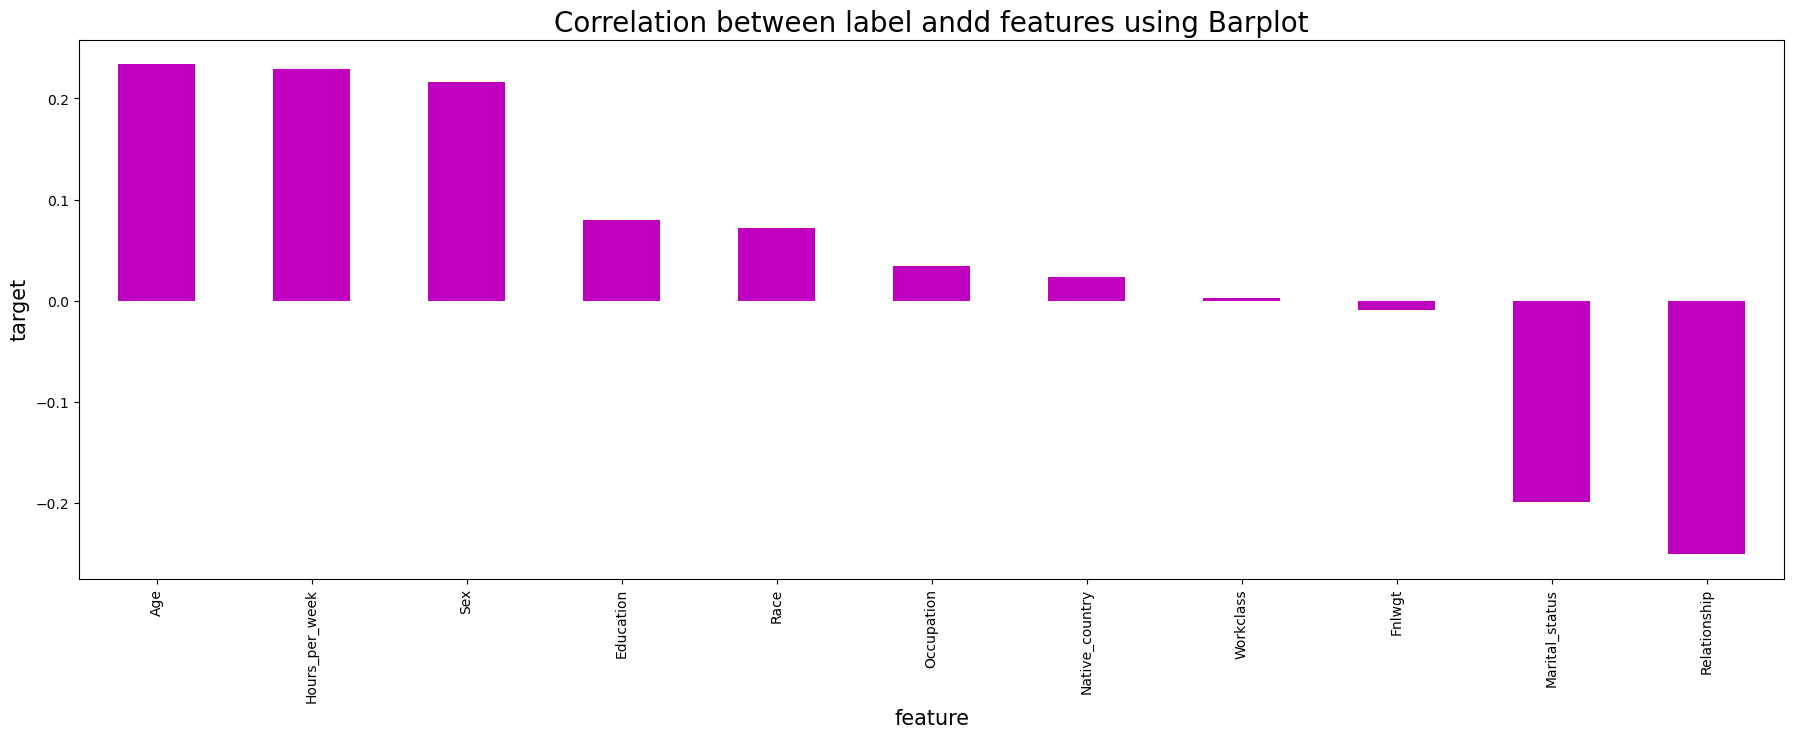

In [63]:
plt.figure(figsize=(22,7))
df.corr()["Income"].sort_values(ascending=False).drop(["Income"]).plot(kind='bar',color="m")
plt.xlabel("feature",fontsize=15)
plt.ylabel("target",fontsize=15)
plt.title("Correlation between label andd features using Barplot", fontsize=20)
plt.show()

# Separating Features and Label(target)

In [64]:
x=df1.drop("Income",axis=1)
y=df1["Income"]

# Feature Scaling using Standard Scalarization

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
X

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.867284,1.730978,-1.088925,-0.343731,-0.398463,-0.781430,-0.897657,0.341670,0.702876,-2.422849,0.192341
1,-0.029475,-0.079808,0.310055,0.173782,-1.724179,-0.279965,-0.274368,0.341670,0.702876,-0.009404,0.192341
2,1.091473,-0.079808,0.511706,-2.413786,-0.398463,-0.279965,-0.897657,-2.987139,0.702876,-0.009404,0.192341
3,-0.104205,-0.079808,1.038812,0.432539,-0.398463,-0.781430,2.218790,0.341670,-1.422726,-0.009404,0.192341
4,0.792554,-0.079808,-0.276230,-1.120002,0.264395,0.221500,-0.274368,-2.987139,-1.422726,-2.154688,-6.263106
...,...,...,...,...,...,...,...,...,...,...,...
29423,-0.851504,-0.079808,0.750421,-0.861245,-0.398463,1.475162,2.218790,0.341670,-1.422726,-0.188178,0.192341
29424,0.119985,-0.079808,-0.337682,0.173782,-0.398463,-0.029233,-0.897657,0.341670,0.702876,-0.009404,0.192341
29425,1.465123,-0.079808,-0.363731,0.173782,2.252970,-1.533628,1.595501,0.341670,-1.422726,-0.009404,0.192341
29426,-1.225153,-0.079808,0.160404,0.173782,0.927254,-1.533628,0.972211,0.341670,0.702876,-1.797141,0.192341


# Checking Variace inflation factor(VIF)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[v(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF Values,Features
0,1.168557,Age
1,1.009871,Workclass
2,1.030340,Fnlwgt
3,1.021286,Education
4,1.141196,Marital_status
5,1.007387,Occupation
6,1.683231,Relationship
7,1.043982,Race
8,1.560851,Sex
9,1.122723,Hours_per_week


##### All the vif values are less than 5. hense no Multicollinearity issue exists. 

In [67]:
y.value_counts()

0.0    22308
1.0     7120
Name: Income, dtype: int64

##### Here we see that the data is not balanced . So lets Balance the data

In [68]:
!pip install scikit-learn==1.2.2
!pip install imblearn

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
SM=SMOTE()
x1, y1 = SM.fit_resample(X,y)

In [71]:
#checking value count of target column
y1.value_counts()

0.0    22308
1.0    22308
Name: Income, dtype: int64

In [72]:
x1.value_counts()

Age        Workclass  Fnlwgt     Education  Marital_status  Occupation  Relationship  Race       Sex        Hours_per_week  Native_country
-1.374613  -0.079808   0.110243   1.208810   0.927254        0.221500    0.972211      0.341670  -1.422726  -2.154688       0.192341          2
-0.776774  -0.079808  -0.400530   0.173782  -0.398463       -0.029233   -0.897657      0.341670   0.702876  -0.009404       0.192341          2
 0.045255  -0.079808  -0.508750  -0.343731  -0.398463       -1.032163   -0.897657      0.341670   0.702876  -0.009404       0.192341          2
 0.717824  -0.079808  -0.324098  -0.602488  -0.398463       -1.032163   -0.897657      0.341670   0.702876  -0.009404       0.192341          2
-1.598803  -2.795987  -0.913628  -2.413786   0.927254       -1.533628   -0.274368     -2.987139  -1.422726  -0.009404       0.192341          1
                                                                                                                                             

In [73]:
print("Shape of x1:", x1.shape)
print("Shape of y1:", y1.shape)

Shape of x1: (44616, 11)
Shape of y1: (44616,)


# Modelling or Model Buildingn and Cross_valuation Score

In [74]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"at random_state", maxRS)

I was not getting any output even after waaititng for a long time

In [77]:
#Creating train test Split 
x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size=0.20,random_state=42)

In [78]:
print('Size of x_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of x_test : ', x_test.shape)
print('Size of y_test : ', y_test.shape)
print('predicted_values:', pred)

Size of x_train :  (35692, 11)
Size of y_train :  (35692,)
Size of x_test :  (8924, 11)
Size of y_test :  (8924,)
predicted_values: [1. 1. 0. ... 0. 0. 1.]


In [79]:
# checking accuracy for RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))
#checking cv score for Random Forest classifier
score1=cross_val_score(RFC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predRFC)-score1.mean())

0.8822277005826984
[[3895  583]
 [ 468 3978]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      4478
         1.0       0.87      0.89      0.88      4446

    accuracy                           0.88      8924
   macro avg       0.88      0.88      0.88      8924
weighted avg       0.88      0.88      0.88      8924

[0.80524429 0.85330046 0.91516306 0.92199933 0.9176286 ]
0.8826671468276348
Difference between Accuraccy_Score and CVS is = -0.0004394462449364145


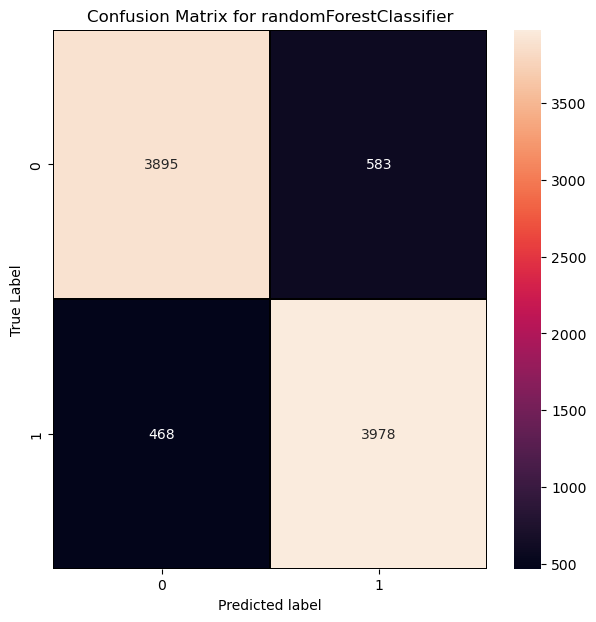

In [80]:
#Lets plot confusion mTatrix for RandomForestClassifier
cm=confusion_matrix(y_test,predRFC)
x_axis_labels=["0","1"]
y_axis_labels= ["0","1"]
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True, linewidths=0.2, linecolor="black",fmt=".0f",ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for randomForestClassifier")
plt.show()

In [81]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
#checking cv score for Support Vector classifier
score2=cross_val_score(svc,x1,y1)
print(score2)
print(score2.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predsvc)-score2.mean())

0.792693859255939
[[3277 1201]
 [ 649 3797]]
              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78      4478
         1.0       0.76      0.85      0.80      4446

    accuracy                           0.79      8924
   macro avg       0.80      0.79      0.79      8924
weighted avg       0.80      0.79      0.79      8924

[0.79370238 0.79311891 0.79838619 0.79861033 0.79804998]
0.7963735581670823
Difference between Accuraccy_Score and CVS is = -0.003679698911143281


In [82]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))
#checking cv score for Gradient Boosting classifier
score3=cross_val_score(GB,x1,y1)
print(score3)
print(score3.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predGB)-score3.mean())

0.8461452263558942
[[3648  830]
 [ 543 3903]]
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      4478
         1.0       0.82      0.88      0.85      4446

    accuracy                           0.85      8924
   macro avg       0.85      0.85      0.85      8924
weighted avg       0.85      0.85      0.85      8924

[0.79616764 0.83245545 0.86999888 0.87526617 0.87414547]
0.8496067204384662
Difference between Accuraccy_Score and CVS is = -0.003461494082572014


In [83]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))
#checking cv score for AdaBoosting classifier
score4=cross_val_score(ABC,x1,y1)
print(score4)
print(score4.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predABC)-score4.mean())

0.834603316898252
[[3579  899]
 [ 577 3869]]
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      4478
         1.0       0.81      0.87      0.84      4446

    accuracy                           0.83      8924
   macro avg       0.84      0.83      0.83      8924
weighted avg       0.84      0.83      0.83      8924

[0.7917974  0.82494677 0.85049871 0.86047294 0.8546453 ]
0.8364722224050147
Difference between Accuraccy_Score and CVS is = -0.0018689055067627747


In [84]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))
#checking cv score for Logistic regresssion
score5=cross_val_score(LR,x1,y1)
print(score5)
print(score5.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predLR)-score5.mean())

0.7148139847601972
[[2976 1502]
 [1043 3403]]
              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70      4478
         1.0       0.69      0.77      0.73      4446

    accuracy                           0.71      8924
   macro avg       0.72      0.71      0.71      8924
weighted avg       0.72      0.71      0.71      8924

[0.70932317 0.72184243 0.71915275 0.71085958 0.72117001]
0.7164695881839411
Difference between Accuraccy_Score and CVS is = -0.0016556034237439343


In [85]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))
#checking cv score for Bagging classifier
score6=cross_val_score(BC,x1,y1)
print(score6)
print(score6.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predBC)-score6.mean())

0.8622814881219184
[[3928  550]
 [ 679 3767]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      4478
         1.0       0.87      0.85      0.86      4446

    accuracy                           0.86      8924
   macro avg       0.86      0.86      0.86      8924
weighted avg       0.86      0.86      0.86      8924

[0.76333483 0.82449849 0.90530091 0.91247338 0.90877508]
0.8628765362584907
Difference between Accuraccy_Score and CVS is = -0.0005950481365722959


In [86]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))
#checking cv score for Extra Tree classifier
score7=cross_val_score(ET,x1,y1)
print(score7)
print(score7.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predET)-score7.mean())

0.8883908561183326
[[3895  583]
 [ 413 4033]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      4478
         1.0       0.87      0.91      0.89      4446

    accuracy                           0.89      8924
   macro avg       0.89      0.89      0.89      8924
weighted avg       0.89      0.89      0.89      8924

[0.845697   0.87369719 0.91830102 0.91998207 0.92031828]
0.8955991102320551
Difference between Accuraccy_Score and CVS is = -0.007208254113722501


In [87]:
from sklearn.tree import DecisionTreeClassifier
DTC =DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))
#checking cv score for Decision Tree classifier
score8=cross_val_score(DTC,x1,y1)
print(score8)
print(score8.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predDTC)-score8.mean())

0.8295607350963693
[[3693  785]
 [ 736 3710]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      4478
         1.0       0.83      0.83      0.83      4446

    accuracy                           0.83      8924
   macro avg       0.83      0.83      0.83      8924
weighted avg       0.83      0.83      0.83      8924

[0.73688929 0.79692928 0.87649894 0.8833352  0.87717135]
0.8341648125229785
Difference between Accuraccy_Score and CVS is = -0.004604077426609177


In [88]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
#checking cv score for K Neighbors Classifier
score9=cross_val_score(knn,x1,y1)
print(score9)
print(score9.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predknn)-score9.mean())

0.8361721201255042
[[3368 1110]
 [ 352 4094]]
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      4478
         1.0       0.79      0.92      0.85      4446

    accuracy                           0.84      8924
   macro avg       0.85      0.84      0.84      8924
weighted avg       0.85      0.84      0.84      8924

[0.8244061  0.83245545 0.84982629 0.85083492 0.85217976]
0.8419405041780585
Difference between Accuraccy_Score and CVS is = -0.0057683840525543095


In [89]:
model=[('RandomForestClassifier',accuracy_score(y_test,predRFC),score1.mean(),accuracy_score(y_test,predRFC)-score1.mean()),
      ('SVC',accuracy_score(y_test,predsvc),score2.mean(),accuracy_score(y_test,predsvc)-score2.mean()),
      ('GradientBoostingClassifier',accuracy_score(y_test,predGB),score3.mean(),accuracy_score(y_test,predGB)-score3.mean()),
      ('AdaBoostClassifier',accuracy_score(y_test,predABC),score4.mean(),accuracy_score(y_test,predABC)-score4.mean()),
      ('LogisticRegression',accuracy_score(y_test,predLR),score5.mean(),accuracy_score(y_test,predLR)-score5.mean()),
      ('BaggingClassifier',accuracy_score(y_test,predBC),score6.mean(),accuracy_score(y_test,predBC)-score6.mean()),
      ('ExtraTreesClassifier',accuracy_score(y_test,predET),score7.mean(),accuracy_score(y_test,predET)-score7.mean()),
    ('DecisionTreesClassifier',accuracy_score(y_test,predDTC),score8.mean(),accuracy_score(y_test,predDTC)-score8.mean()),
    ('KNeighborsClassifier',accuracy_score(y_test,predknn),score9.mean(),accuracy_score(y_test,predknn)-score9.mean())
      ]

In [90]:
Model = pd.DataFrame(data = model, columns=['Model','Accuracy Score','Cross Validation', 'Difference'])
Model

,Model,Accuracy Score,Cross Validation,Difference
0,RandomForestClassifier,0.882228,0.882667,-0.000439
1,SVC,0.792694,0.796374,-0.003680
2,GradientBoostingClassifier,0.846145,0.849607,-0.003461
3,AdaBoostClassifier,0.834603,0.836472,-0.001869
4,LogisticRegression,0.714814,0.716470,-0.001656
5,BaggingClassifier,0.862281,0.862877,-0.000595
6,ExtraTreesClassifier,0.888391,0.895599,-0.007208
7,DecisionTreesClassifier,0.829561,0.834165,-0.004604
8,KNeighborsClassifier,0.836172,0.841941,-0.005768


# Hyper Parameter Tuning

In [91]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameters distribution to search
param_dist = {'criterion': ['gini','entropy'],
              'random_state':[10,50,1000],
    'n_estimators': [50, 100, 200, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [False, True]
}

In [93]:
# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=ET, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [96]:
# Fit the model
random_search.fit(x1, y1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200, 400,
                                                         500],
                                        'random_state': [10, 50, 1000]},
                   random_state=42, verbose=2)

In [97]:
# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'random_state': 10, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': False}
Best Score: 0.8935594224063408


In [98]:
# Get the best estimator
best_etc = random_search.best_estimator_

In [99]:
# Predict and evaluate
y_pred = best_etc.predict(x1)
print(classification_report(y1, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     22308
         1.0       0.99      0.99      0.99     22308

    accuracy                           0.99     44616
   macro avg       0.99      0.99      0.99     44616
weighted avg       0.99      0.99      0.99     44616



In [100]:
Final_model=ExtraTreesClassifier(random_state=10, n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=50, criterion= 'gini', bootstrap= False)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

88.5365307037203


# Ploting ROC AUC Curve

In [102]:
#Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay

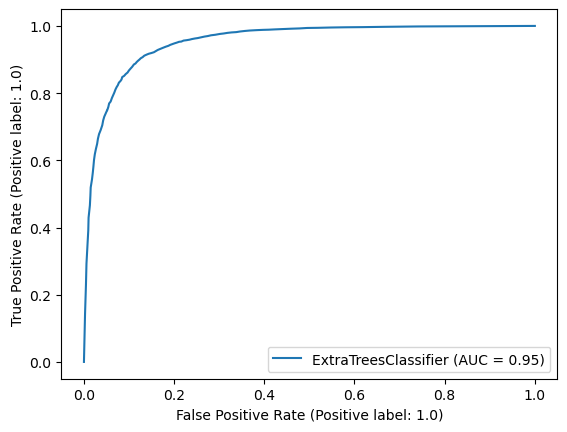

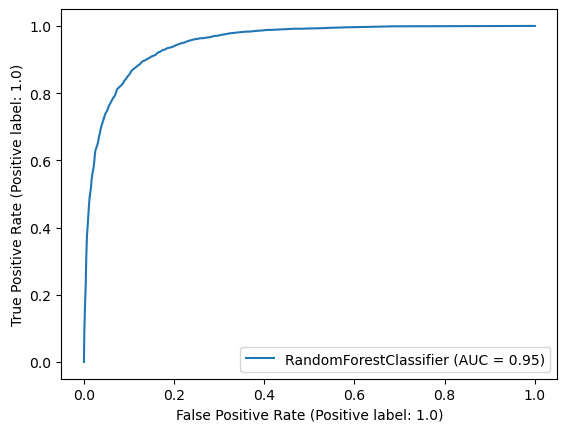

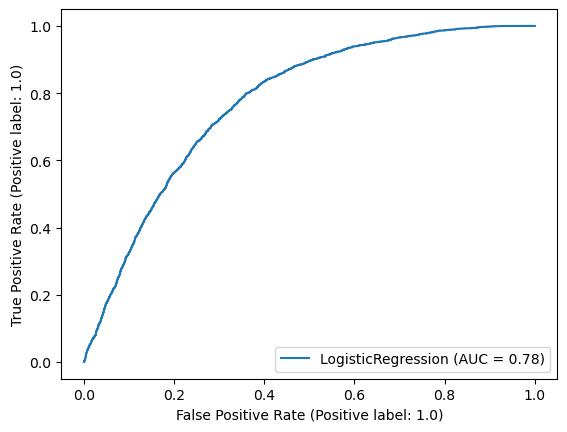

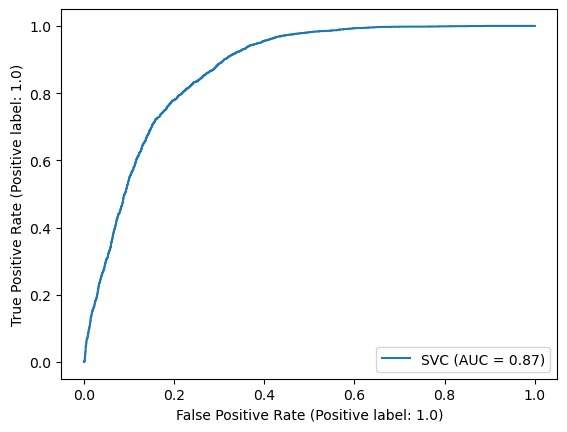

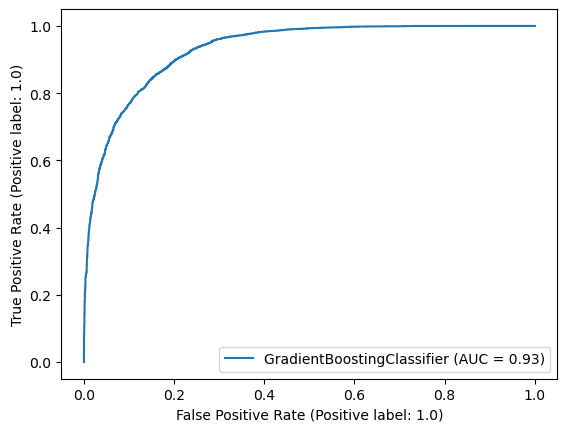

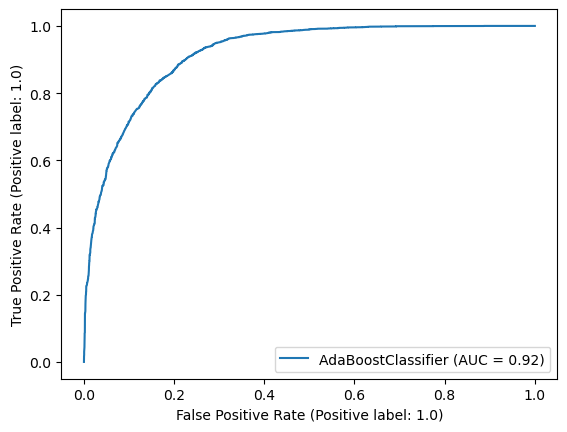

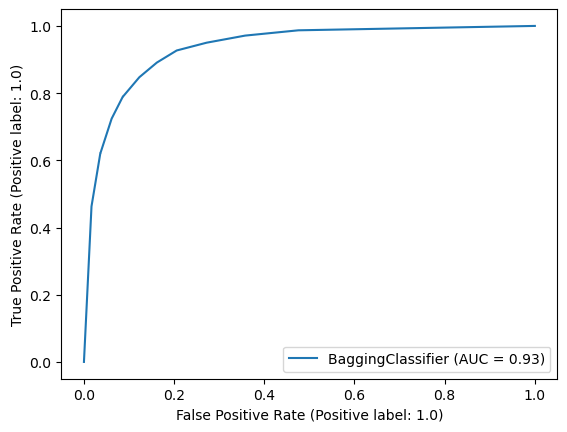

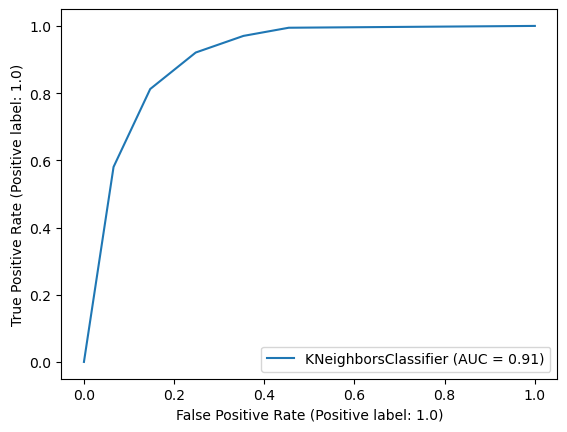

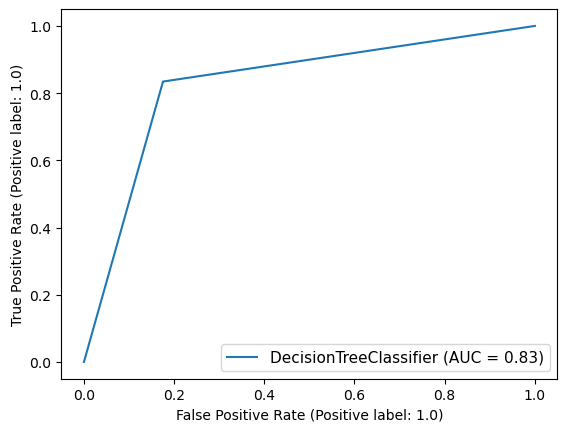

In [103]:
display= RocCurveDisplay.from_estimator(ET,x_test,y_test) #ax =Axes with confusion Matrix
RocCurveDisplay.from_estimator(RFC,x_test,y_test)
RocCurveDisplay.from_estimator(LR,x_test,y_test)
RocCurveDisplay.from_estimator(svc,x_test,y_test)
RocCurveDisplay.from_estimator(GB,x_test,y_test)
RocCurveDisplay.from_estimator(ABC,x_test,y_test)
RocCurveDisplay.from_estimator(BC,x_test,y_test)
RocCurveDisplay.from_estimator(knn,x_test,y_test)
RocCurveDisplay.from_estimator(DTC,x_test,y_test)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

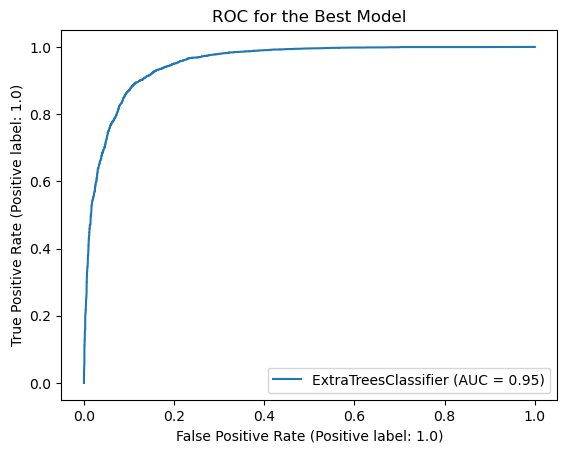

In [104]:
#Lets check the AUC for the best model after hyper parameter tuning
RocCurveDisplay.from_estimator(Final_model,x_test,y_test)
plt.title("ROC for the Best Model")
plt.show()

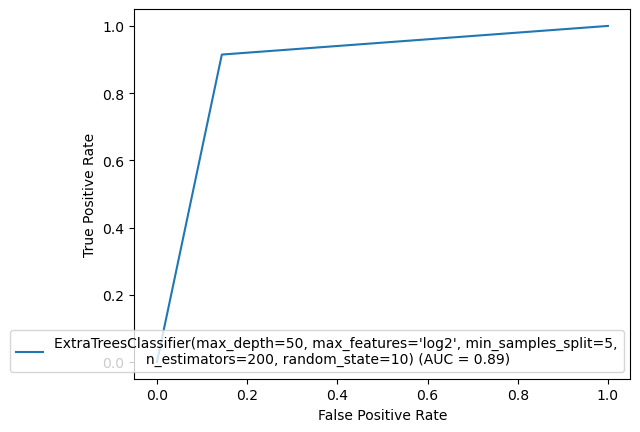

In [105]:
from sklearn import metrics
fpr,tpr,thesholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

#### Here we have plotted the ROC curve for the final model and the AUC value for the best model is 89%

In [106]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Census_Income_Prediction.pkl")

['Census_Income_Prediction.pkl']

# Predicting the saved model

In [107]:
#lets load the saved model and get the predictions
model=joblib.load('Census_Income_Prediction.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([1., 0., 0., ..., 0., 0., 0.])

#### these are predicted churned values of the customers

In [108]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
8919,0.0,0.0
8920,0.0,1.0
8921,0.0,0.0
8922,0.0,0.0


# We have predicted for 8924 rows using the best suitable model Extra Tree Classifier.